In [1]:
!git init

Initialized empty Git repository in C:/Users/User/Desktop/Data Science/git_housing/.git/


### Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error  
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

#### Load dataset

In [3]:
train_data = pd.read_csv('train.csv', index_col = 'Id')
test_data = pd.read_csv('test.csv', index_col = 'Id')
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


### About the dataset

The train data consist of 80 columns and 1460 rows. The rows represent different houses for while the columns reresents different features of these houses. Some of these features are explained below.

MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotArea: Lot size in square feet

LotShape: General shape of property

Street: Type of road access to property

Utilities: Type of utilities available

OverallCond: Rates the overall condition of the house

OverallQual: Rates the overall material and finish of the house

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

ExterCond: Evaluates the present condition of the material on the exterior

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

KitchenQual: Kitchen quality

GarageYrBlt: Year garage was built

BldgType: Type of dwelling

In [6]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	housing.ipynb
	iowa_housing.ipynb
	test.csv
	train.csv

nothing added to commit but untracked files present (use "git add" to track)


In [7]:
!git add .ipynb_checkpoints housing.ipynb test.csv train.csv

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [8]:
!git commit -m "load datasets"

[master (root-commit) 3015c57] load datasets
 5 files changed, 3945 insertions(+)
 create mode 100644 .ipynb_checkpoints/housing-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/iowa_housing-checkpoint.ipynb
 create mode 100644 housing.ipynb
 create mode 100644 test.csv
 create mode 100644 train.csv


In [9]:
!git rm .ipynb_checkpoints/iowa_housing-checkpoint.ipynb

rm '.ipynb_checkpoints/iowa_housing-checkpoint.ipynb'


In [13]:
!git remote add origin https://github.com/Godsfavour1/new.git
!git branch -M main
!git push -u origin main

error: remote origin already exists.


branch 'main' set up to track 'origin/main'.


To https://github.com/Godsfavour1/new.git
 * [new branch]      main -> main


In [14]:
!git branch -M main
!git push -u origin main

branch 'main' set up to track 'origin/main'.


Everything up-to-date


#### data assessment and exploration

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [16]:
#check columns with missing values
train_data.isnull().sum()[train_data.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
#Drop all columns with more than 81 missing values
#81 so as to include details about the garage
missing_cols_to_drop = [col for col in train_data.columns if train_data[col].isnull().sum() > 81]
train_data = train_data.drop(missing_cols_to_drop, axis = 1)
train_data.isnull().sum()[train_data.isnull().sum() > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [18]:
temp_num_cols = [col for col in train_data.columns if train_data[col].dtypes in ['int64', 'float64']]

#Remove columns object columns with too many unique entries (high dimentionality)
temp_obj_cols = [col for col in train_data.columns if train_data[col].dtypes == 'object' and train_data[col].nunique() < 6]
train_data[temp_obj_cols].nunique()

MSZoning        5
Street          2
LotShape        4
LandContour     4
Utilities       2
LotConfig       5
LandSlope       3
BldgType        5
MasVnrType      4
ExterQual       4
ExterCond       5
BsmtQual        4
BsmtCond        4
BsmtExposure    4
HeatingQC       5
CentralAir      2
Electrical      5
KitchenQual     4
GarageFinish    3
GarageQual      5
GarageCond      5
PavedDrive      3
dtype: int64

In [19]:
#It is possible the entries in train and test data differ in some categorical columns
non_uniform_cat_cols = []

for col in temp_obj_cols:
    for i in train_data[col].unique():
        if isinstance(i, str) and i not in test_data[col].unique():
            non_uniform_cat_cols.append(col)
non_uniform_cat_cols

['Utilities', 'Electrical', 'GarageQual']

In [20]:
#update temp_obj_cols
obj_cols = [e for e in temp_obj_cols if e not in non_uniform_cat_cols]

In [21]:
train_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


some columns have as high as the 3rd quartile as 0. The mean of many values are greatly affected by extreme values. The lot area for example, has 75% of its distribution below 11,700 but a mean of of 10,516 and standard deviation of 9981.

##### SalePrice

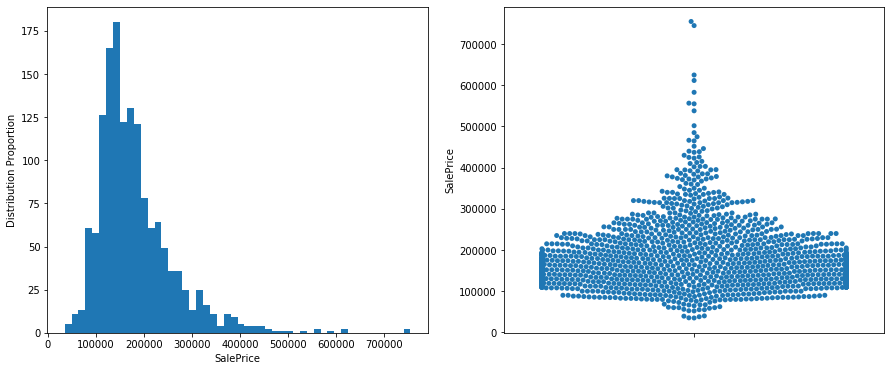

In [22]:
plt.figure(figsize = [15,6])
plt.subplot(1,2,1)
plt.hist(data = train_data, x = 'SalePrice', bins = 50)
plt.xlabel('SalePrice')
plt.ylabel('Distribution Proportion')

plt.subplot(1,2,2)
sns.swarmplot(y = train_data['SalePrice']);

The SalePrice distribution is right skewed. The modal house price is between 130,000 and 160,000. Majority of the SalePrice ranges between 100,000 to 220,000.

#### LotArea

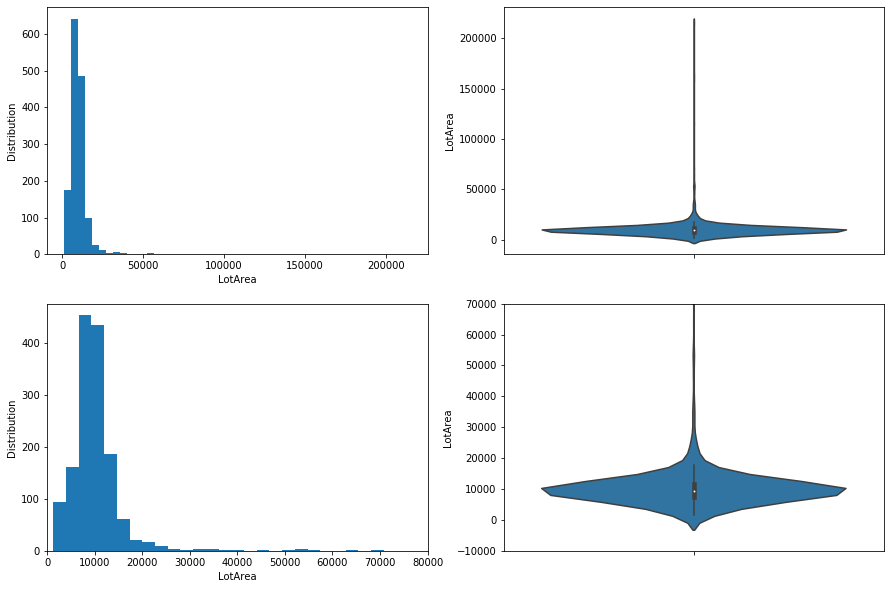

In [23]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
plt.hist(data = train_data, x = 'LotArea', bins = 50)
plt.xlabel('LotArea')
plt.ylabel('Distribution')

plt.subplot(2,2,2)
sns.violinplot(y = train_data['LotArea'])

plt.subplot(2,2,3)
plt.hist(data = train_data, x = 'LotArea', bins = 80)
plt.xlim(0, 80000)
plt.xlabel('LotArea')
plt.ylabel('Distribution')


plt.subplot(2,2,4)
sns.violinplot(y = train_data['LotArea'])
plt.ylim(-10000,70000);

The LotArea distribution is right skewed. Modal LotArea ranges between 8,000 and 12,000 and just about 4 houses have LotAreas greater than 100000. Majority of LotAreas are below 30,000

In [24]:
#those 4 houses are outliers. remove outliers in LotArea
train_data = train_data[train_data.LotArea < 100000]

##### remodel year and saleprice

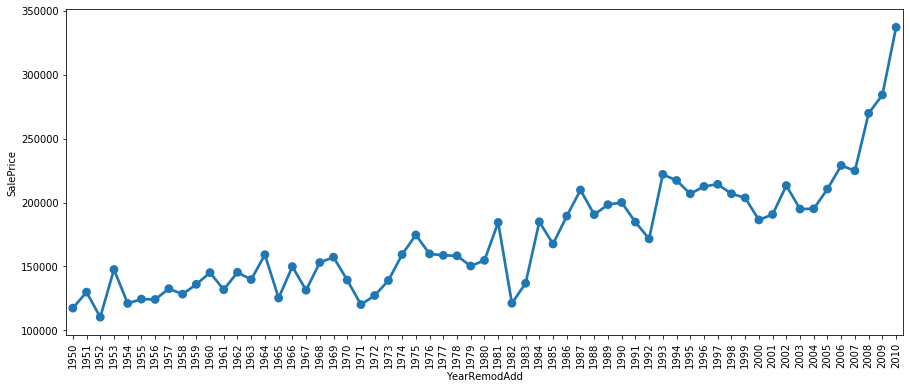

In [25]:
plt.figure(figsize = [15,6])
sns.pointplot(data = train_data, x = 'YearRemodAdd', y = 'SalePrice', ci = None)
plt.xticks(rotation = 90);

There is an increase in SalePrice as the Remodel date of the houses increase.

#### Building types and MSZoning

In [ ]:
plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
sns.countplot(data = train_data, x = 'BldgType')

plt.subplot(1,2,2)
sns.barplot(data = train_data, x = 'BldgType', y = 'SalePrice');